# Data Science Lab - 6
### Karthik Bommaraju
### 207166
### Section - B

 # Logistic Regression

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
def sigmoid_activation(x):
    return 1.0 / (1.0 + np.exp(-x))

In [89]:
def normalize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    return (X - X_mean) / X_std

In [90]:
def train_test_split(X, y, test_size=None, train_size=None):
    if test_size is None and train_size is None:
        test_size = 0.25
    if train_size is None:
        train_size = 1 - test_size
    arr_rand = np.random.rand(len(X))
    mask = arr_rand < np.percentile(arr_rand, int(train_size * 100))
    X_train = X[mask]
    y_train = y[mask]
    X_test = X[~mask]
    y_test = y[~mask]
    return X_train, X_test, y_train, y_test

In [107]:
class LogisticRegression:
    def __init__(self, X, y, alpha, reg=None, lambda_reg=1.0):
        self.X = X
        self.X_norm = np.insert(normalize(X), 0, 1, axis=1)
        self.y = y.reshape(-1, 1)
        self.alpha = alpha
        self.reg = reg
        self.lambda_reg = lambda_reg
        self.Theta = np.ones(shape=(self.X_norm.shape[1], 1), dtype='float64')
        self.m = len(X)
    def reg_term(self, theta):
        if self.reg is None:
            return np.zeros(theta.shape)
        if self.reg == 'l1':
            lasso_reg_term = (self.lambda_reg / self.m) * np.sign(theta)
            lasso_reg_term[0] = 0
            return lasso_reg_term
        ridge_reg_term = (self.lambda_reg / self.m) * theta
        ridge_reg_term[0] = 0
        return ridge_reg_term
    def batch_gradient_descent(self, num_iter):
        iterations = 0
        while iterations < num_iter:
            loss_derivative = (self.X_norm.T @ (sigmoid_activation(self.X_norm @ self.Theta) - self.y)) / self.m
            loss_derivative += self.reg_term(self.Theta) / self.m
            h=sigmoid_activation(self.X_norm @ self.Theta)
            if np.linalg.norm(loss_derivative) < 1e-5:
                break
            self.Theta = self.Theta - (self.alpha * loss_derivative)
            iterations += 1
        print('Iterations: ', iterations)
    def predict(self, X):
        X_norm = np.insert(normalize(X), 0, 1, axis=1)
        y = sigmoid_activation(X_norm @ self.Theta)
        return (y > 0.5).astype(float)
    def weight_vector(self):
        print(self.Theta)
    def performance_measure(self, X_test, y_test):
        y_pred = self.predict(X_test).reshape(-1,)
        true_positive = np.sum((y_test == 1) & (y_pred == 1))
        true_negative = np.sum((y_test == 0) & (y_pred == 0))
        false_positive = np.sum((y_test == 0) & (y_pred == 1))
        false_negative = np.sum((y_test == 1) & (y_pred == 0))
        values = np.array([[true_negative, false_positive], [false_negative, true_positive]])
        fig, ax = plt.subplots()
        ax.matshow(values)
        for (i, j), z in np.ndenumerate(values):
            ax.text(j, i, z, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        accuracy = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1_score = 2 * accuracy * recall / (accuracy + recall)
        print("Accuracy: ", accuracy)
        print("Recall: ", recall)
        print("F1 Score: ", f1_score)

### Data Fetching and Preprocessing

In [108]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [111]:
X = X.values
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [112]:
y = y.values
y[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [113]:
X.shape, y.shape

((768, 8), (768,))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [115]:
X_train[:5]

array([[1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01]])

In [116]:
X_test[:5]

array([[6.00e+00, 1.48e+02, 7.20e+01, 3.50e+01, 0.00e+00, 3.36e+01,
        6.27e-01, 5.00e+01],
       [5.00e+00, 1.16e+02, 7.40e+01, 0.00e+00, 0.00e+00, 2.56e+01,
        2.01e-01, 3.00e+01],
       [3.00e+00, 7.80e+01, 5.00e+01, 3.20e+01, 8.80e+01, 3.10e+01,
        2.48e-01, 2.60e+01],
       [2.00e+00, 1.97e+02, 7.00e+01, 4.50e+01, 5.43e+02, 3.05e+01,
        1.58e-01, 5.30e+01],
       [5.00e+00, 1.66e+02, 7.20e+01, 1.90e+01, 1.75e+02, 2.58e+01,
        5.87e-01, 5.10e+01]])

In [117]:
y_train[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [118]:
y_test[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

### No Regularization

In [120]:
log_reg = LogisticRegression(X_train, y_train, alpha=1e-2)

In [121]:
log_reg.batch_gradient_descent(num_iter=1000)

Iterations:  1000


In [123]:
log_reg.weight_vector()


[[-0.41421309]
 [ 0.48043544]
 [ 0.9940352 ]
 [-0.05528066]
 [ 0.13898634]
 [ 0.2757964 ]
 [ 0.59440349]
 [ 0.54453458]
 [ 0.37278116]]


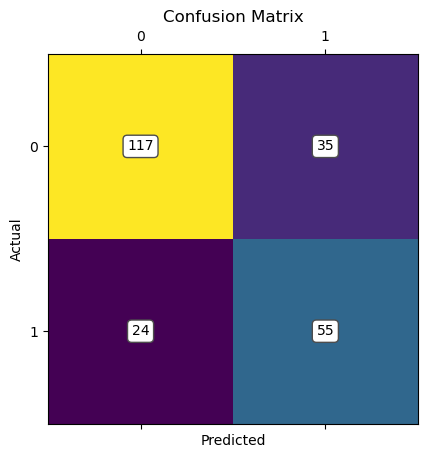

Accuracy:  0.6111111111111112
Recall:  0.6962025316455697
F1 Score:  0.650887573964497


In [124]:
log_reg.performance_measure(X_test, y_test)

### Lasso Regularization

In [22]:
log_reg_lasso = LogisticRegression(X_train, y_train, alpha=1e-2, reg='l1', lambda_reg=25)

In [23]:
log_reg_lasso.batch_gradient_descent(num_iter=1000)

Iterations:  1000


In [24]:
log_reg_lasso.weight_vector()

[[ 0.38658724]
 [ 0.07584046]
 [-0.31127223]
 [ 1.19931644]
 [-0.01551312]
 [ 0.15859547]
 [ 0.23125004]
 [ 0.64088191]
 [ 1.11448518]
 [-0.07513521]
 [-0.01058195]
 [ 0.96286472]
 [-0.48034668]
 [-0.34711682]]


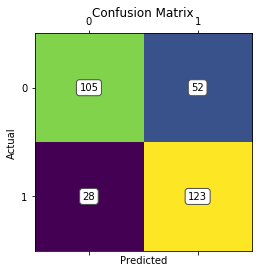

Accuracy:  0.7028571428571428
Recall:  0.8145695364238411
F1 Score:  0.7546012269938652


In [25]:
log_reg_lasso.performance_measure(X_test, y_test)

### Ridge Regularization

In [26]:
log_reg_ridge = LogisticRegression(X_train, y_train, alpha=1e-1, reg='l2', lambda_reg=25)

In [27]:
log_reg_ridge.batch_gradient_descent(num_iter=1000)

Iterations:  1000


In [28]:
log_reg_ridge.weight_vector()

[[-0.08109006]
 [-0.13070762]
 [-1.02055201]
 [ 0.90220987]
 [-0.35038257]
 [-0.39692531]
 [-0.01086713]
 [ 0.11178594]
 [ 0.69154903]
 [-0.53569951]
 [-0.51725344]
 [ 0.46800793]
 [-0.78907653]
 [-0.52411381]]


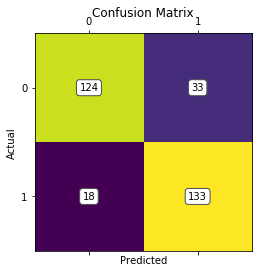

Accuracy:  0.8012048192771084
Recall:  0.8807947019867549
F1 Score:  0.8391167192429021


In [29]:
log_reg_ridge.performance_measure(X_test, y_test)